**14.** Escreva um algoritmo (em pseudocódigo) que realize busca binária
de forma iterativa e o implemente numa linguagem de programação a sua escolha. Construa um gráfico mostrando a relação valor de entrada x tempo de
execução do algoritmo implementado. Considerando uma análise assintótica
em pior caso, explique se o desempenho do algoritmo implementado é superior, inferior ou igual ao do algoritmo que implementa busca binária de forma
recursiva.

### **Resolução:**

Visando atender os objetivos do exercício proposto, o presente trabalho apresenta a busca binária, uma técnica eficiente para localizar elementos em listas ordenadas. Inicialmente, apresenta-se o pseudocódigo da busca binária iterativa. Em seguida, destacamos a implementação prática dessa estratégia em Python, demonstrando como a busca pode ser traduzida em código funcional.

Posteriormente, expandimos nossa análise para incluir a busca binária recursiva, apresentando seu pseudocódigo e sua implementação em Python. A busca binária recursiva divide a lista em segmentos menores por meio de chamadas recursivas, proporcionando uma alternativa à abordagem iterativa.

A fim de comparar o desempenho dessas duas estratégias, gerou-se listas ordenadas aleatórias de tamanhos variados e mediu-se o tempo de execução para a busca do pior caso, onde o alvo não está presente na lista. O código fornecido implementa essa análise assintótica e oferece uma visão comparativa entre a busca binária iterativa e recursiva. Através de gráficos, buscamos visualizar e compreender melhor as complexidades e eficiências relativas dessas abordagens.

#### pseudocódigo da busca binária iterativa


---


```
Função busca_binaria(listaOrdenada, alvo):
    indiceInício = 0
    indiceFim = tamanho(listaOrdenada) - 1
    enquanto indiceInício <= indiceFim faça
        meio = (indiceInício + indiceFim) // 2
        se listaOrdenada[meio] == alvo faça
            retorne meio
        senão se listaOrdenada[meio] < alvo faça
            início = meio + 1
        senão:
            fim = meio - 1
    retorne -1
```



#### Busca binária Iterativa


---

In [ ]:
def busca_binaria_iterativa(lista_ordenada, alvo):
    inicio = 0
    fim = len(lista_ordenada) - 1

    while inicio <= fim:
        meio = (inicio + fim) // 2

        if alvo == lista_ordenada[meio]:
            return meio
        elif alvo < lista_ordenada[meio]:
            fim = meio - 1
        else:
            inicio = meio + 1

    return -1

#### Análise comparativa da Busca Binária: **Recursiva** vs **Iterativa**

---



In [ ]:
import random
import timeit
import matplotlib.pyplot as plt

def gerar_lista_ordenada_aleatoria(tamanho):
    """Função que retorna uma lista ordenada aleatória com números entre 1 e 10000 de tamanho recebido por parâmetro"""
    lista = [random.randint(1, 1000) for _ in range(tamanho)]
    lista.sort()
    return lista

In [ ]:
def busca_binaria_recursiva(lista_ordenada, alvo, inicio, fim):
    """
    Função de busca binária recursiva.

    Parâmetros:
    - lista_ordenada (list): Lista ordenada de elementos.
    - alvo: Elemento a ser buscado na lista.
    - inicio (int): Índice de início da busca.
    - fim (int): Índice de fim da busca.

    Retorna:
    - int: Índice do elemento alvo se encontrado.
    - -1: Caso o elemento alvo não esteja presente na lista.
    """

    if inicio <= fim:
        meio = inicio + (fim - inicio) // 2

        if alvo == lista_ordenada[meio]:
            return meio
        elif alvo < lista_ordenada[meio]:
            return busca_binaria_recursiva(lista_ordenada, alvo, inicio, meio - 1)
        else:
            return busca_binaria_recursiva(lista_ordenada, alvo, meio + 1, fim)
    else:
        return -1

In [ ]:
def busca_binaria_iterativa(lista_ordenada, alvo):
    """
    Função que realiza busca binária iterativa em uma lista ordenada.

    Parâmetros:
    - lista_ordenada (list): Lista ordenada de números.
    - alvo (int): Valor a ser buscado na lista.

    Retorna:
    - int: Índice do alvo na lista, ou -1 se o alvo não estiver presente.
    """

    inicio = 0
    fim = len(lista_ordenada) - 1

    while inicio <= fim:
        meio = (inicio + fim) // 2

        if alvo == lista_ordenada[meio]:
            return meio
        elif alvo < lista_ordenada[meio]:
            fim = meio - 1
        else:
            inicio = meio + 1

    return -1

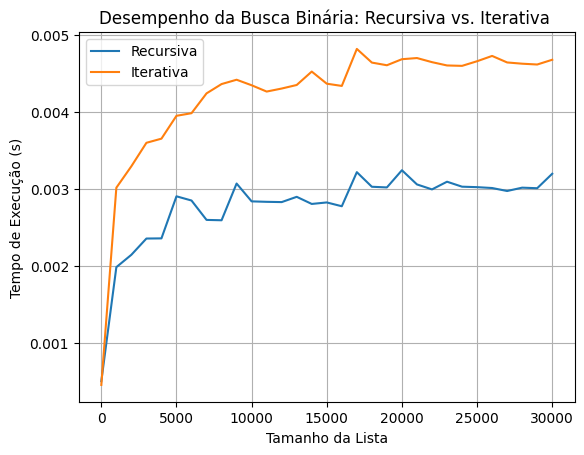

In [ ]:
# Análise assintótica 

# gera a lista de tamanhos de entrada dos vetores usados na análise
tamanhos = list(range(0, 30001, 1000))

# Listas pra guardar o tempo de execução pra da busca em cada tamanho de entrada
tempos_recursiva = []
tempos_iterativa = []

# loop pra calcular o tempo de execução conforme o tamanho de entrada
for tamanho in tamanhos:

    lista_ordenada = gerar_lista_ordenada_aleatoria(tamanho)
    alvo =-1  # busca no pior caso -> alvo não está na lista

    tempo_recursiva = timeit.timeit(lambda: busca_binaria_iterativa(lista_ordenada, alvo), number=1000)
    tempo_iterativa = timeit.timeit(lambda: busca_binaria_recursiva(lista_ordenada, alvo, 0, len(lista_ordenada) - 1), number=1000)

    #Guarda a média do tempo de 1000 execuções pra determinado tamanho de entrada
    tempos_recursiva.append(tempo_recursiva)
    tempos_iterativa.append(tempo_iterativa)

# Gera o gráfico
plt.plot(tamanhos, tempos_recursiva, label='Recursiva')
plt.plot(tamanhos, tempos_iterativa, label='Iterativa')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo de Execução (s)')
plt.legend()
plt.title('Desempenho da Busca Binária: Recursiva vs. Iterativa ')
plt.grid(True)
plt.show()

#### **Análise comparativa assintótica no pior caso**

---

Na avaliação assintótica dos algoritmos de busca binária iterativa e recursiva, observa-se que ambas abordagens exibem um comportamento semelhante. A análise detalhada dos códigos revela a aplicação da estratégia de "dividir e conquistar" dos algoritmos. Em cada iteração ou chamada recursiva, o intervalo de busca é consistentemente dividido ao meio, conforme expresso por: `meio = inicio + (fim - inicio) // 2`.

No contexto da busca binária iterativa, essa estratégia é implementada por meio do loop while que atualiza os limites da busca nas seguintes instruções:

```
(...)

 elif alvo < lista_ordenada[meio]:
            fim = meio - 1
        else:
            inicio = meio + 1
(...)

```
Já na versão recursiva, a divisão ocorre por meio de chamadas recursivas que reduzem progressivamente o intervalo de busca.

```
      (...)
      return meio
        elif alvo < lista_ordenada[meio]:
            return busca_binaria_recursiva(lista_ordenada, alvo, inicio, meio - 1)
        else:
            return busca_binaria_recursiva(lista_ordenada, alvo, meio + 1, fim)
      (...)
```
A análise gráfica complementa essa observação, evidenciando que ambas as abordagens exibem complexidade assintótica logarítmica em relação ao tamanho da entrada. Reforçando o entendimento anterior, essa complexidade logarítmica é inerente à estratégia de "dividir e conquistar", na qual o espaço de busca é reduzido pela metade a cada iteração.